In [70]:
import pymysql
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
from datetime import datetime
import time
import seaborn as sns
%matplotlib inline

In [35]:
conn = pymysql.connect('rdsl1bdoa7h7d5ko2hkno.mysql.rds.aliyuncs.com',
                       user='bossaccess',
                       passwd = 'master-502',
                       db = 'chekumaster',
                       charset='utf8')
sql = "select * from cheku_spec_order where create_time > '2017-01-01' and del_flag != 1"

In [36]:
df = pd.read_sql(sql,conn)

In [37]:
data = df[['create_time','order_num','order_info','buy_num',
           'cheku_price','username','earnest',
           'order_status','car_id','bag_id','create_id','out_color']]

In [38]:
sql = '''SELECT cheku_car_model.id, cheku_car_brand.name, cheku_car_series.name, cheku_car_model.name, cheku_car_msrp.price
FROM cheku_car_msrp INNER JOIN (cheku_car_model INNER JOIN 
(cheku_car_brand INNER JOIN cheku_car_series ON cheku_car_brand.id = cheku_car_series.brand_id) 
ON cheku_car_model.series_id = cheku_car_series.id) ON cheku_car_msrp.model_id = cheku_car_model.id;
'''

In [39]:
carinfo = pd.read_sql(sql,conn)

In [40]:
sql = '''SELECT cheku_spec_sale_req.id, cheku_spec_sale_req.msrp
FROM cheku_spec_sale_req;
'''

In [41]:
bagidf3 = pd.read_sql(sql,conn)

In [42]:
data2 = pd.merge(data,bagidf3,left_on = 'car_id',right_on = 'id' , how = 'left') 

In [43]:
cols = 'create_time', 'order_num', 'order_info','msrp', 'buy_num', 'cheku_price','username', 'earnest', 'order_status', 'car_id', 'bag_id', 'id'
#changel 'msrp' col
data2_msrp = data2['msrp']
data2 = data2.drop('msrp',axis =1)
data2.insert(3,'msrp',data2_msrp)
data2 = data2.drop('bag_id',axis = 1)

In [44]:
temp = pd.DataFrame((x.split(':') for x in data2.order_info),columns=['brand','m','series','model'])
temp = temp.drop('m',axis = 1)
data2.insert(2,'brand',temp['brand'])
data2.insert(3,'series',temp['series'])
data2.insert(4,'model',temp['model'])
data2 = data2.drop('order_info',axis = 1)

In [45]:
data2['msrp'] = [int(x) / 100 for x in data2['msrp']]

In [46]:
status = Series(range(-3,10))
status_info = Series(['融资审核','','用户取消','待付定金','已付定金','已分配VIN号',
                     '定金凭证已上传','已付首付','全款凭证已上传','首付凭证已上传',
                     '已完成','已付全款','融资审核中'])
status = DataFrame({'status':status,'status_info':status_info})
data2 = pd.merge(data2,status,left_on = 'order_status',right_on = 'status',how = 'left')

In [47]:
sql = ''

In [48]:
data2

,create_time,order_num,brand,series,model,msrp,buy_num,cheku_price,username,earnest,order_status,car_id,create_id,out_color,id,status,status_info
0,2017-01-20 11:26:54,T170120288465,雪佛兰,科鲁兹,2015款 1.5L 经典 SE AT,1099,1,86900,宋广源,2000,1,699,79,珍珠白,699,1,已付定金
1,2017-02-08 15:35:02,T170208504028,雪佛兰,赛欧,2016款 赛欧3 1.3L 手动舒适天窗版,639,1,50900,王阿蒙,0,1,700,79,茉莉白,700,1,已付定金
2,2017-02-08 15:55:44,T170208768356,雪佛兰,赛欧,2015款 赛欧3 1.5L 手动理想版,679,1,53900,王阿蒙,0,1,701,79,茉莉白,701,1,已付定金
3,2017-02-08 16:09:10,T170208286047,雪佛兰,科沃兹,2016款 1.5L 自动欣享版,889,1,79900,王阿蒙,0,1,702,79,玛瑙红,702,1,已付定金
4,2017-02-08 16:11:34,T170208652519,雪佛兰,科沃兹,2016款 1.5L 自动欣享版,889,2,159800,王阿蒙,0,1,703,79,珍珠白,703,1,已付定金
5,2017-02-08 16:15:39,T170208744523,雪佛兰,科沃兹,2016款 1.5L 自动欣悦版,999,3,269700,王阿蒙,0,1,704,79,珍珠白,704,1,已付定金
6,2017-02-09 14:37:43,T170209532288,雪佛兰,赛欧,2016款 赛欧3 1.3L 手动舒适天窗版,639,6,303600,张云范,12000,-2,705,79,茉莉白,705,-2,
7,2017-02-15 09:27:51,T170215912439,雪佛兰,科沃兹,2016款 1.5L 手动欣悦版,909,1,81900,王阿蒙,0,1,708,79,珍珠白,708,1,已付定金
8,2017-02-23 10:16:41,T170223419085,雪佛兰,科帕奇,2017款 2.4L 四驱旗舰版 7座,2099,1,183900,何进,5000,1,709,20,旷夜黑,709,1,已付定金
9,2017-02-23 10:22:42,T170223268817,雪佛兰,科帕奇,2017款 2.4L 四驱旗舰版 7座,2099,1,183900,路萌,3000,1,710,20,摩卡棕,710,1,已付定金


In [49]:
data2 = data2.drop(['order_status','status','car_id','id'],axis = 1)

In [50]:
sql = 'SELECT id,chnname FROM chekumaster.cheku_user;'
user = pd.read_sql(sql,conn)


In [51]:
data2 = pd.merge(data2,user,left_on= 'create_id',right_on = 'id',how='inner')
data2 = data2.drop('create_id',axis = 1)

In [52]:
times = pd.to_datetime(data2.create_time)
data2['create_time'] = [time.strftime('%Y-%m-%d') for time in times]

In [53]:
data2

,create_time,order_num,brand,series,model,msrp,buy_num,cheku_price,username,earnest,out_color,status_info,id,chnname
0,2017-01-20,T170120288465,雪佛兰,科鲁兹,2015款 1.5L 经典 SE AT,1099,1,86900,宋广源,2000,珍珠白,已付定金,79,赵有民
1,2017-02-08,T170208504028,雪佛兰,赛欧,2016款 赛欧3 1.3L 手动舒适天窗版,639,1,50900,王阿蒙,0,茉莉白,已付定金,79,赵有民
2,2017-02-08,T170208768356,雪佛兰,赛欧,2015款 赛欧3 1.5L 手动理想版,679,1,53900,王阿蒙,0,茉莉白,已付定金,79,赵有民
3,2017-02-08,T170208286047,雪佛兰,科沃兹,2016款 1.5L 自动欣享版,889,1,79900,王阿蒙,0,玛瑙红,已付定金,79,赵有民
4,2017-02-08,T170208652519,雪佛兰,科沃兹,2016款 1.5L 自动欣享版,889,2,159800,王阿蒙,0,珍珠白,已付定金,79,赵有民
5,2017-02-08,T170208744523,雪佛兰,科沃兹,2016款 1.5L 自动欣悦版,999,3,269700,王阿蒙,0,珍珠白,已付定金,79,赵有民
6,2017-02-09,T170209532288,雪佛兰,赛欧,2016款 赛欧3 1.3L 手动舒适天窗版,639,6,303600,张云范,12000,茉莉白,,79,赵有民
7,2017-02-15,T170215912439,雪佛兰,科沃兹,2016款 1.5L 手动欣悦版,909,1,81900,王阿蒙,0,珍珠白,已付定金,79,赵有民
8,2017-02-23,T170223485974,雪佛兰,迈锐宝XL,2016款 2.5L 自动锐尊版,2499,1,213900,王阿蒙,0,州际灰,已完成,79,赵有民
9,2017-02-27,T170227303925,别克,英朗,2017款 15N 自动进取型,1199,1,92900,王阿蒙,2000,雪域白,已完成,79,赵有民


In [54]:
data2 = data2.drop(['order_num','id'],axis = 1)

In [55]:
data2

,create_time,brand,series,model,msrp,buy_num,cheku_price,username,earnest,out_color,status_info,chnname
0,2017-01-20,雪佛兰,科鲁兹,2015款 1.5L 经典 SE AT,1099,1,86900,宋广源,2000,珍珠白,已付定金,赵有民
1,2017-02-08,雪佛兰,赛欧,2016款 赛欧3 1.3L 手动舒适天窗版,639,1,50900,王阿蒙,0,茉莉白,已付定金,赵有民
2,2017-02-08,雪佛兰,赛欧,2015款 赛欧3 1.5L 手动理想版,679,1,53900,王阿蒙,0,茉莉白,已付定金,赵有民
3,2017-02-08,雪佛兰,科沃兹,2016款 1.5L 自动欣享版,889,1,79900,王阿蒙,0,玛瑙红,已付定金,赵有民
4,2017-02-08,雪佛兰,科沃兹,2016款 1.5L 自动欣享版,889,2,159800,王阿蒙,0,珍珠白,已付定金,赵有民
5,2017-02-08,雪佛兰,科沃兹,2016款 1.5L 自动欣悦版,999,3,269700,王阿蒙,0,珍珠白,已付定金,赵有民
6,2017-02-09,雪佛兰,赛欧,2016款 赛欧3 1.3L 手动舒适天窗版,639,6,303600,张云范,12000,茉莉白,,赵有民
7,2017-02-15,雪佛兰,科沃兹,2016款 1.5L 手动欣悦版,909,1,81900,王阿蒙,0,珍珠白,已付定金,赵有民
8,2017-02-23,雪佛兰,迈锐宝XL,2016款 2.5L 自动锐尊版,2499,1,213900,王阿蒙,0,州际灰,已完成,赵有民
9,2017-02-27,别克,英朗,2017款 15N 自动进取型,1199,1,92900,王阿蒙,2000,雪域白,已完成,赵有民


In [56]:
data2['cheku_price'] = [int(x) for x in data2['cheku_price']]


In [57]:
data2

,create_time,brand,series,model,msrp,buy_num,cheku_price,username,earnest,out_color,status_info,chnname
0,2017-01-20,雪佛兰,科鲁兹,2015款 1.5L 经典 SE AT,1099,1,86900,宋广源,2000,珍珠白,已付定金,赵有民
1,2017-02-08,雪佛兰,赛欧,2016款 赛欧3 1.3L 手动舒适天窗版,639,1,50900,王阿蒙,0,茉莉白,已付定金,赵有民
2,2017-02-08,雪佛兰,赛欧,2015款 赛欧3 1.5L 手动理想版,679,1,53900,王阿蒙,0,茉莉白,已付定金,赵有民
3,2017-02-08,雪佛兰,科沃兹,2016款 1.5L 自动欣享版,889,1,79900,王阿蒙,0,玛瑙红,已付定金,赵有民
4,2017-02-08,雪佛兰,科沃兹,2016款 1.5L 自动欣享版,889,2,159800,王阿蒙,0,珍珠白,已付定金,赵有民
5,2017-02-08,雪佛兰,科沃兹,2016款 1.5L 自动欣悦版,999,3,269700,王阿蒙,0,珍珠白,已付定金,赵有民
6,2017-02-09,雪佛兰,赛欧,2016款 赛欧3 1.3L 手动舒适天窗版,639,6,303600,张云范,12000,茉莉白,,赵有民
7,2017-02-15,雪佛兰,科沃兹,2016款 1.5L 手动欣悦版,909,1,81900,王阿蒙,0,珍珠白,已付定金,赵有民
8,2017-02-23,雪佛兰,迈锐宝XL,2016款 2.5L 自动锐尊版,2499,1,213900,王阿蒙,0,州际灰,已完成,赵有民
9,2017-02-27,别克,英朗,2017款 15N 自动进取型,1199,1,92900,王阿蒙,2000,雪域白,已完成,赵有民


In [58]:
grouped = data2[['buy_num','cheku_price']].groupby(data2['chnname'])

In [59]:
grouped.sum()

,buy_num,cheku_price
chnname,,
赵有民,42,2936900
陈汀,5,900500


In [60]:
data2.index = data2.create_time

In [61]:
data2.index = pd.to_datetime(data2.index)

In [62]:
temp = data2[['buy_num','cheku_price']].groupby([data2.series,data2.msrp]).resample('MS').sum().unstack()

In [63]:
temp.fillna('')

buy_num                       cheku_price                      
create_time 2017-01-01 2017-02-01 2017-03-01  2017-01-01 2017-02-01 2017-03-01
series msrp                                                                   
科帕奇    1899                     1          1                 164900     161900
       2099                     4          3                 735600     272850
科沃兹    889                      3                            239700           
       909                      1                             81900           
       999                      3         10                 269700     639250
       1099                               10                            469500
科鲁兹    1099          1                             86900                      
英朗     1199                     1                             92900           
赛欧     639                      7                            354500           
       679                      1                             53900           
迈锐宝XL  2499                     1                            213900

In [67]:
temp = data2.buy_num.groupby(data2.series).sum()

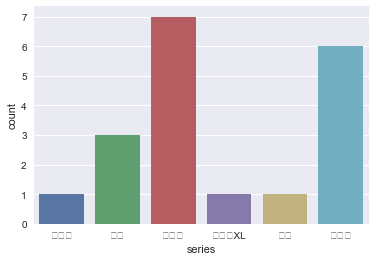

In [73]:
sns.countplot(data2.series)

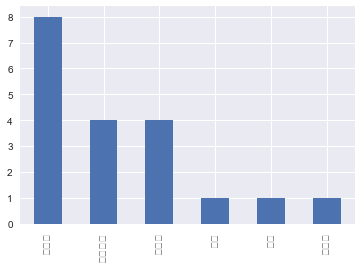

In [99]:
data2.username.value_counts().plot(kind='bar')

In [89]:
month_data = data2.buy_num.groupby(pd.to_datetime(data2['create_time']).dt.month).sum()

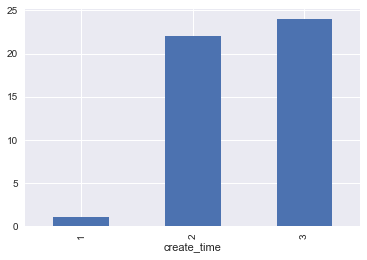

In [101]:
month_data.plot(kind='bar')

In [82]:
data2.create_time[:5]

create_time
2017-01-20    2017-01-20
2017-02-08    2017-02-08
2017-02-08    2017-02-08
2017-02-08    2017-02-08
2017-02-08    2017-02-08
Name: create_time, dtype: object